<a href="https://colab.research.google.com/github/moaaztaha/Arabic-Image-Captioning-Demo/blob/main/Demo_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from ipywidgets import FileUpload
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
import os

def setup():
    print("Cloning repos....")
    os.system("git clone https://github.com/moaaztaha/Arabic-Image-Captioning-Demo")
    os.system("git clone https://github.com/aub-mind/arabert")
    os.system("mv  -v /content/Arabic-Image-Captioning-Demo/* .")
    os.system("pip install -r requirements.txt")
    warnings.filterwarnings("ignore")
setup()

Cloning repos....


In [11]:
# updating dgown before downloading files from gdrive
!pip install --upgrade --no-cache-dir gdown --quiet

# supporting arabic text for matplotlib
!pip install python-bidi --quiet
!pip install arabic-reshaper --quiet

In [12]:
from caption import caption_image, caption_image_viz, visualize_att

In [14]:
# downloading the model

if Path('BEST_checkpoint_flickr8k_ar_arabert_pretrained_finetune.pth.tar').is_file():
    print("Arabert Model file exists!!!")
else:
    print("Downloading Arabert model...")
    os.system('gdown --id 1-6o5yt2oMrgJBlKA_pToQqXpntI-ZYoB')
if Path('BEST_checkpoint_flickr8k_ar_pretrained_finetune.pth.tar').is_file():
    print("Old Model file exists!!!")
else:
    print("Downloading Old model...")
    os.system('gdown --id 1-3yPtc-7esopr7dAEMz1G4oBeHdhMc9n')

Arabert Model file exists!!!
Old Model file exists!!!


# The model trained using Simple Preprocessing 
## Captioning an image

In [18]:
old = True

In [19]:
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

100%|██████████| 24000/24000 [00:00<00:00, 289761.10it/s]


----------------------------------------------------------------------------------------------------
كلب أبيض يركض عبر العشب


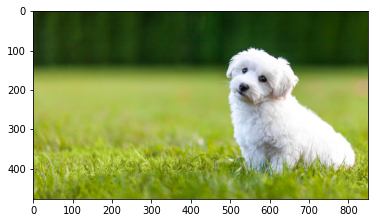

In [20]:
output = caption_image(upload, old=old)
if len(upload.data):
  img=plt.imread("test.png", 0)
  plt.imshow(img)
  # plt.title(output)
  print("-"*100)
  print(output)
else:
  print("Upload an image!!!")

# Caption with Visualization

In [21]:
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

100%|██████████| 24000/24000 [00:00<00:00, 292372.58it/s]


[tensor(-3.4462, grad_fn=<UnbindBackward0>), tensor(-3.9040, grad_fn=<UnbindBackward0>), tensor(-4.5235, grad_fn=<UnbindBackward0>)]
********** Best 3 Captions **********
كلب أبيض يركض عبر العشب
كلب أبيض يركض في العشب
كلب أبيض يركض في حقل
*************************************


100%|██████████| 24000/24000 [00:00<00:00, 243480.34it/s]


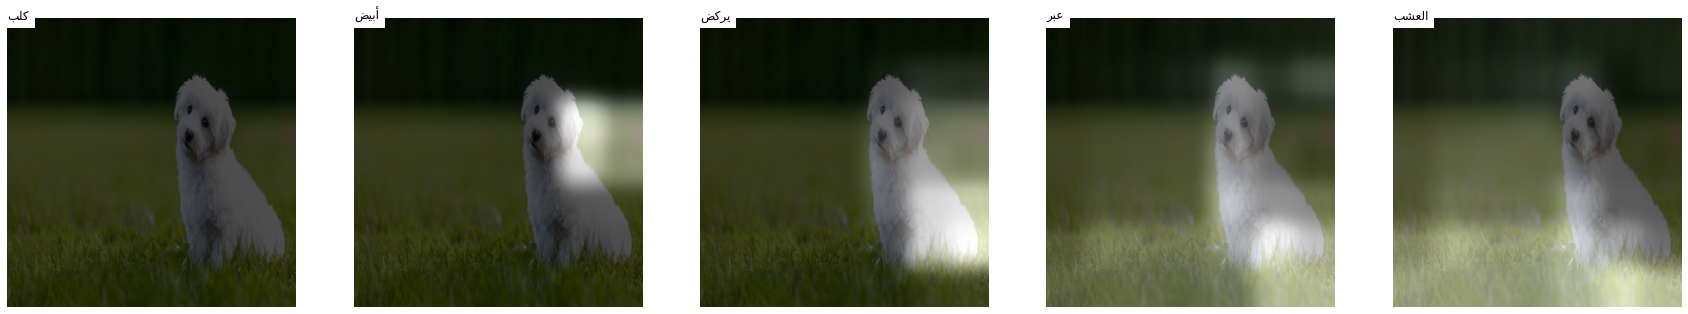

In [22]:
if len(upload.data):
  alphas, seq, all_caps = caption_image_viz(upload, old=old)
  print("********** Best 3 Captions **********")
  for c in all_caps:
    print(c)
  print("*************************************")
  visualize_att(seq, alphas, old=old)
else:
  print("Upload an image !!")

# The model trained using AraBert Preprocessing 
## Captioning an image

In [23]:
old = False

In [24]:
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

100%|██████████| 24000/24000 [00:00<00:00, 172145.81it/s]


----------------------------------------------------------------------------------------------------
الكلب الأبيض والأبيض في العشب


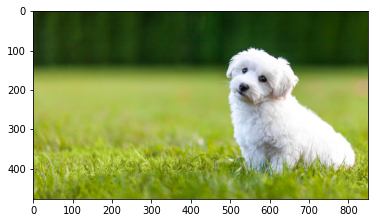

In [25]:
output = caption_image(upload, old=old)
if len(upload.data):
  img=plt.imread("test.png", 0)
  plt.imshow(img)
  # plt.title(output)
  print("-"*100)
  print(output)
else:
  print("Upload an image!!!")

# Caption with Visualization

In [26]:
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

100%|██████████| 24000/24000 [00:00<00:00, 185538.05it/s]


[tensor(-14.6591, grad_fn=<UnbindBackward0>), tensor(-18.1723, grad_fn=<UnbindBackward0>)]
********** Best 3 Captions **********
ال + كلب ال + أبيض و + ال + أبيض في ال + عشب
ال + كلب ال + أبيض و + ال + أبيض في ال + عشب ال + أبيض
*************************************


100%|██████████| 24000/24000 [00:00<00:00, 176630.78it/s]


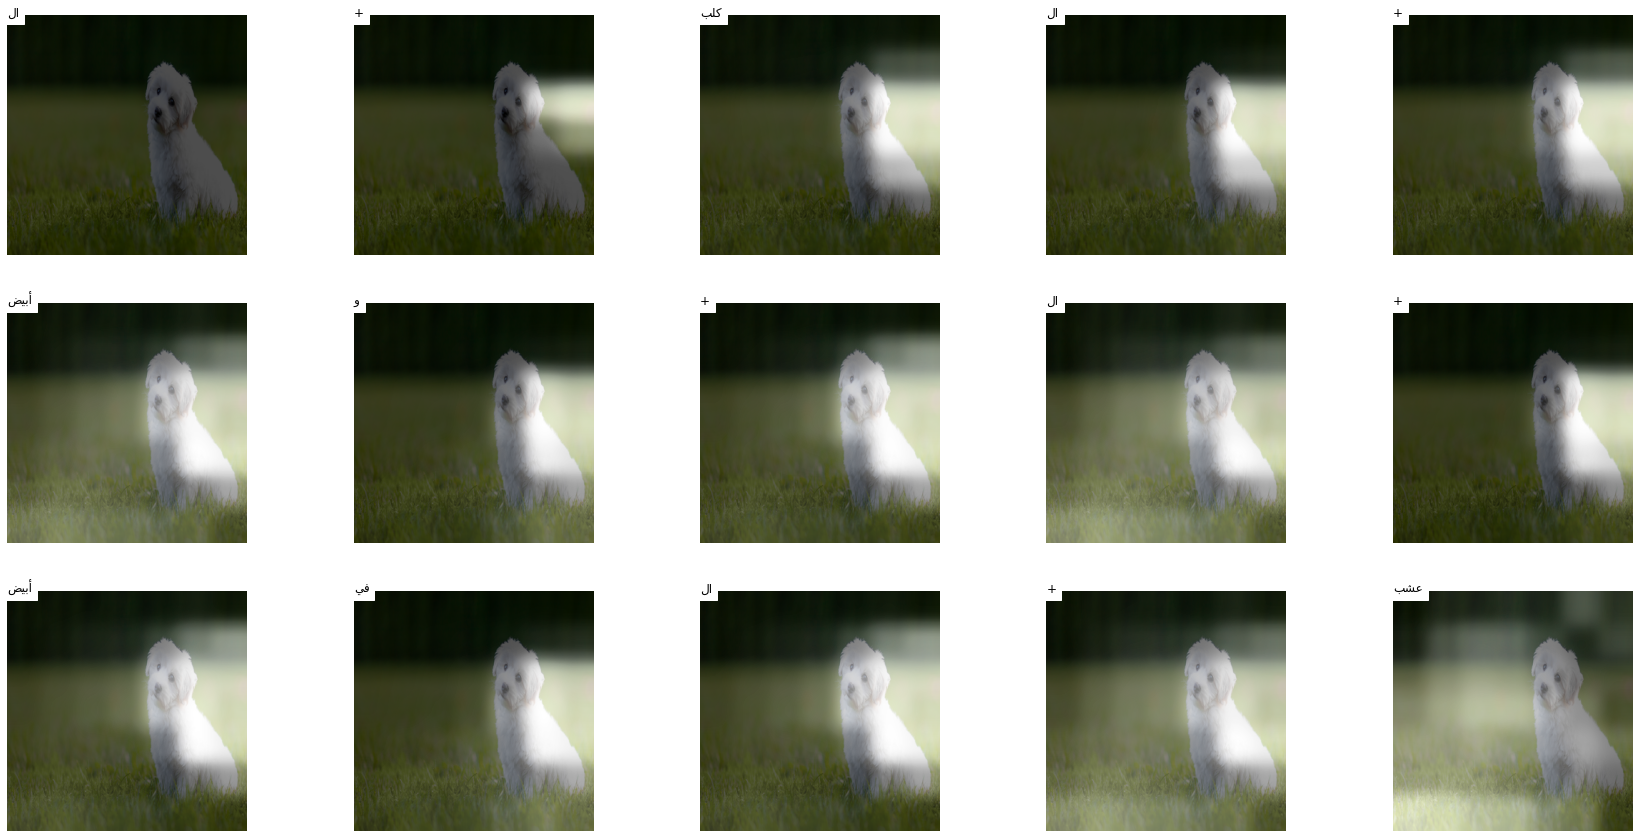

In [27]:
if len(upload.data):
  alphas, seq, all_caps = caption_image_viz(upload, old=old)
  print("********** Best 3 Captions **********")
  for c in all_caps:
    print(c)
  print("*************************************")
  visualize_att(seq, alphas, old=old)
else:
  print("Upload an image !!")